In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/creditcard_fraud_extended (1).csv")

In [4]:
data

,Transaction_Amount,Merchant_ID,Cardholder_Age,Card_Type,Location,Time_of_day,Day_of_week,Previous_Transactions_Count,Previous_Fraudulent_Transactions_Count,Label
0,1061.810178,M1,46.000000,Credit,UK,Afternoon,Tuesday,4.000000,1.0,True
1,151.438150,M2,20.000000,Credit,Australia,Morning,Friday,14.000000,0.0,False
2,772.737451,M4,38.000000,Credit,USA,Morning,Tuesday,2.000000,0.0,True
3,529.526914,M2,59.000000,Credit,Australia,Afternoon,Saturday,7.000000,0.0,False
4,1427.579014,M5,61.000000,Debit,Canada,Night,Friday,4.000000,0.0,True
...,...,...,...,...,...,...,...,...,...,...
1095,665.690612,M1,31.672745,Credit,USA,Afternoon,Wednesday,11.624686,0.0,False
1096,649.175022,M2,44.611278,Debit,Canada,Night,Saturday,12.034582,0.0,False
1097,818.120686,M5,52.663691,Debit,Australia,Evening,Tuesday,12.440323,0.0,False
1098,317.539696,M1,30.749048,Credit,USA,Afternoon,Monday,4.715022,0.0,False


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [7]:
# List of categorical features
categorical_features = ['Merchant_ID', 'Card_Type', 'Location', 'Time_of_day', 'Day_of_week']

# Perform one-hot encoding for categorical features
data_encoded = pd.get_dummies(data, columns=categorical_features)

data_encoded# Define the feature set X and the target variable y
X = data_encoded.drop(columns=['Label'])
y = data_encoded['Label']

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
# Create a DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier(random_state=42) # You can adjust hyperparameters like max_depth, min_samples_split, etc.

# Train the model using the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.9727272727272728
              precision    recall  f1-score   support

       False       0.98      0.99      0.98       286
        True       0.93      0.86      0.89        44

    accuracy                           0.97       330
   macro avg       0.95      0.93      0.94       330
weighted avg       0.97      0.97      0.97       330



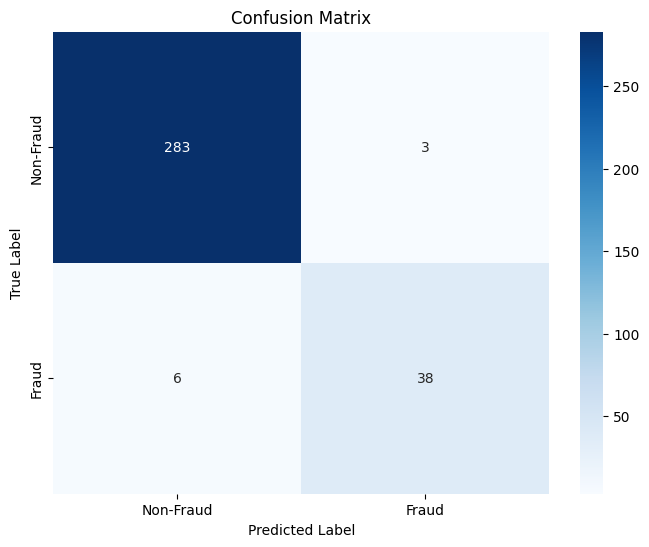

In [12]:
# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Generate a classification report
print(classification_report(y_test, y_pred))

# Create and display a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues" ,  xticklabels=['Non-Fraud', 'Fraud'], yticklabels=['Non-Fraud', 'Fraud'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

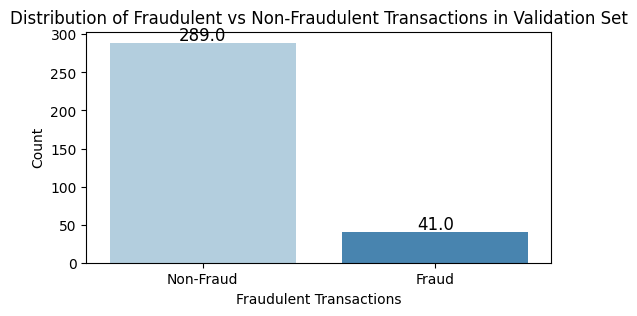

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the count plot for y_val (true labels)
plt.figure(figsize=(6, 3))
ax = sns.countplot(x=y_pred, hue=y_pred, palette='Blues', legend=False)

# Add the count labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=12, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.xlabel('Fraudulent Transactions')
plt.ylabel('Count')
plt.title('Distribution of Fraudulent vs Non-Fraudulent Transactions in Validation Set')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()


**Comparison of Decision Tree and Logistic Regression for Fraud Detection**

**decision tree :**

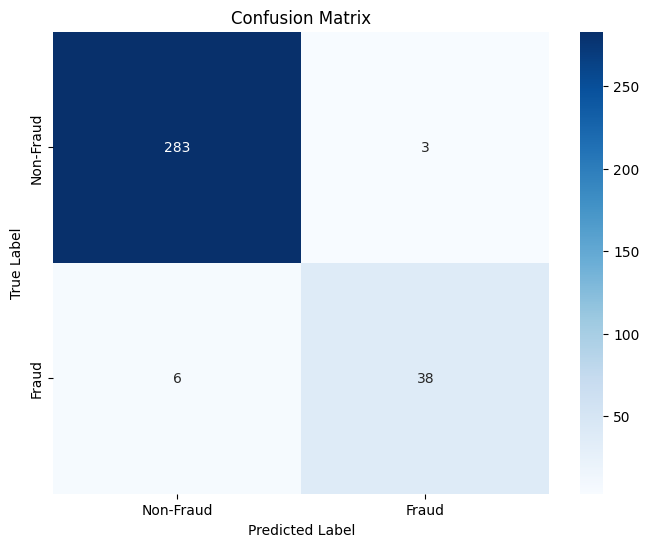


**logistic regressor:**

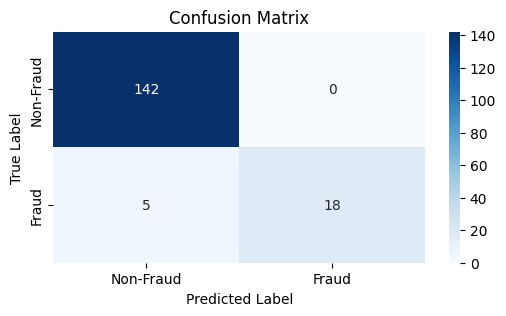

1. **Accuracy:**

**Decision Tree:** 97.27%

**Logistic Regression:** 96.97%

Both models have similar accuracy, with Decision Tree performing slightly better.

2. **Precision (for Fraudulent Cases - True Class):**

**Decision Tree:** 93%

**Logistic Regression:** 100%

 Logistic Regression perfectly identifies fraudulent cases when predicting positive, but may have some false negatives.

3. **Recall (for Fraudulent Cases - True Class):**

**Decision Tree:** 86%

**Logistic Regression:** 78%

Decision Tree detects a higher percentage of actual fraud cases (higher recall), making it better at identifying frauds.

4. **F1-score (for Fraudulent Cases - True Class):**

**Decision Tree: ** 89%

**Logistic Regression:** 88%

Both models have similar F1-scores, but Decision Tree has a slight edge.

** Logistic Regression is more precise but has lower recall.Decision Tree performs better overall due to its balance between precision and recall, ensuring it captures more fraudulent transactions. **